In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [30]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMSE,lowerBound, upperBound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-19:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-19:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSMeanPred = TS[len(TS)-19:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-18:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp.copy()
    TSLower[1:] = TSlow.copy()

    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')    
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMSE)
    ax.set_title('in_N=[18,19], hi_N= [9,11,19], learn_R=[0.15,0.2,0.19], iter=[20,50]\n'+ MSEtext)    
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = '1 std_dev Bounds')
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Test_predicions_2015_1.png")
    del fig
    gc.collect()

In [46]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMSE,lowerBound, upperBound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-7:len(TS)-0].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-7:len(TS)-0].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSMeanPred = TS[len(TS)-7:len(TS)-0].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-6:len(TS)-0])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp.copy()
    TSLower[1:] = TSlow.copy()

    #TSUpper.plot(style = 'ro-')
    #TSLower.plot(style = 'ro-')    
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMSE)
    ax.set_title('in_N=[6,7], hi_N= [9,11,7], learn_R=[0.15,0.2,0.7], iter=[20,50]\n'+ MSEtext)    
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = '1 std_dev Bounds')
    #title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMSE))
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Test_predicions_2015_1.png")
    del fig
    gc.collect()

In [ ]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [36]:
def ValAnalyze(predictions,TS,annotate= False):
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
    params = ['Param1','Param2','Param3','Param4']
    predictions = predictions.reset_index(drop = True)
    meanPred = np.mean(predictions[preds])
    RMSE = np.sqrt(np.mean((TS[-18:-6].values-meanPred)**2))
    MeanRMSE = np.sqrt(np.mean(predictions['MSE']))
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    if annotate:
        print "mean Predictions = " + (str)(meanPred.values)
        print "real Values = " +(str)(TS[-18:-6].values)
        print "RMSE = " + (str)(RMSE)
        print "Mean RMSE = " + (str)(MeanRMSE) 
    plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,lowerBound.as_matrix(),upperBound.as_matrix())

In [48]:
def TestAnalyze(predictions,TS,annotate= False):
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']
    params = ['Param1','Param2','Param3','Param4']
    predictions = predictions.reset_index(drop = True)
    meanPred = np.mean(predictions[preds])
    RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))
    #MeanRMSE = np.sqrt(np.mean(predictions['MSE']))
    MeanRMSE = 0
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    if annotate:
        print "mean Predictions = " + (str)(meanPred.values)
        print "real Values = " +(str)(TS[-12:-6].values)
        print "RMSE = " + (str)(RMSE)
        print "Mean RMSE = " + (str)(MeanRMSE) 
    plot_TestSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,lowerBound.as_matrix(),upperBound.as_matrix())

In [38]:
predictions =  pd.read_csv("Results/iteraciones/Val_predicions_2015_2.csv" )
TS = get_TS()

mean Predictions = [ 1.81871372  7.7905104  -1.53504466 -0.55379348 -0.40389604 -3.65582614
 -5.79159991  8.62668947 -0.32962307  0.73454026  0.39627888 -0.78629931]
real Values = [ 2.53  4.13 -1.41  0.09 -1.86 -2.36 -5.09  7.91 -1.05  1.96  0.27  0.78]
RMSE = 1.40328767303
Mean RMSE = 1.40328767303


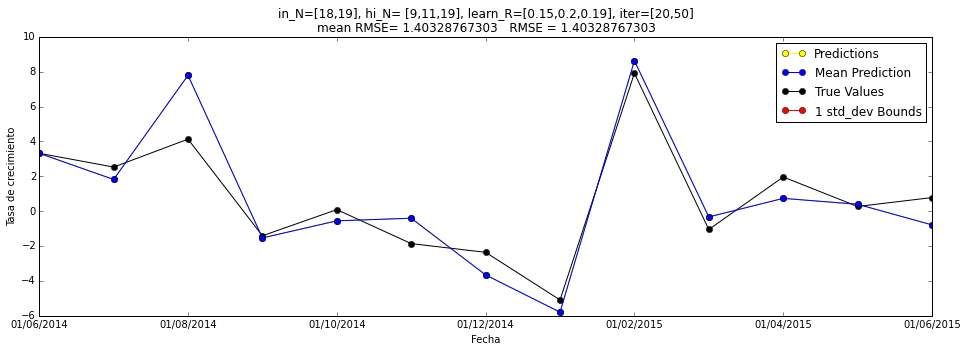

In [39]:
ValAnalyze(predictions,TS,True)

In [40]:
TestPredictions =  pd.read_csv("Results/iteraciones/Test_predicions_2015_2.csv" )

mean Predictions = [ 1.31877162  1.58019762  0.51983353  8.71436267  0.04418599  5.67395435]
real Values = [-5.09  7.91 -1.05  1.96  0.27  0.78]
RMSE = 5.05348601285
Mean RMSE = 0


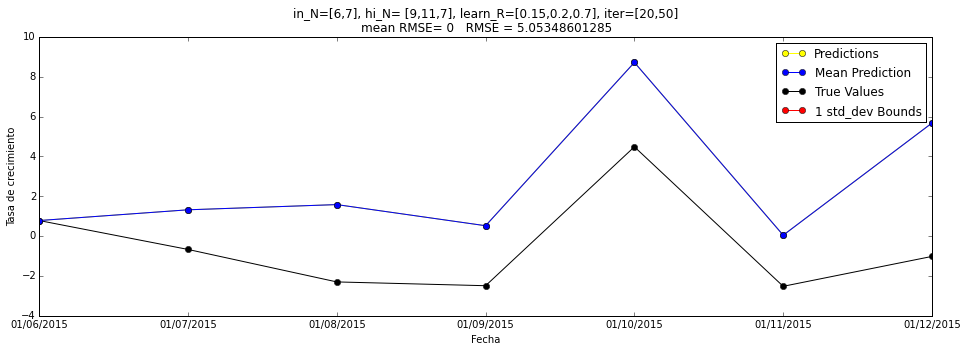

In [49]:
TestAnalyze(TestPredictions,TS,True)

In [12]:
meanPred = np.mean(predictions[preds])
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))
#MeanRMSE = np.sqrt(np.mean(predictions['MSE']))
MeanRMSE = 0

In [13]:
TS[-8]

0.27000000000000002

In [14]:
upperBound = meanPred + MeanRMSE
lowerBound = meanPred - MeanRMSE

In [15]:
lowerBound

Pred1   -4.936925
Pred2    7.070266
Pred3   -0.075505
Pred4    0.959861
Pred5   -0.923799
Pred6    0.158722
dtype: float64

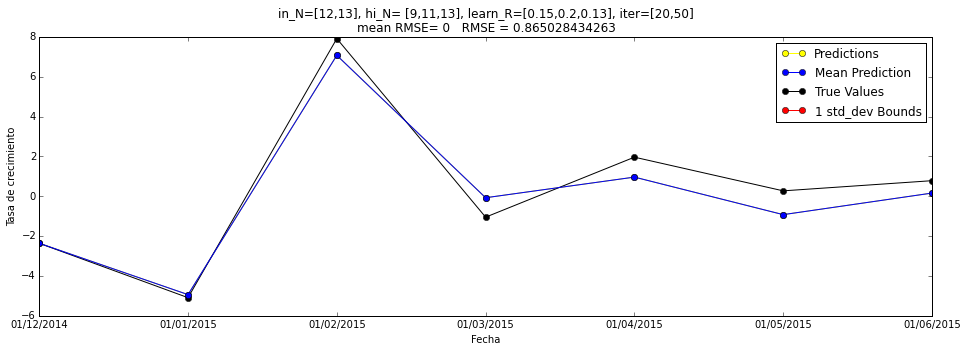

In [16]:
plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,lowerBound.as_matrix(),upperBound.as_matrix())

In [ ]:
plot_TestSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,lowerBound.as_matrix(),upperBound.as_matrix())

In [17]:
predMSE = np.mean(predictions['MSE'])
print predMSE

0.748274192084


In [18]:
predParam1 = predictions.groupby('Param1')

In [20]:
predParam1.count()

,Param2,Param3,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param1,,,,,,,,,,,
12,22,22,22,22,22,22,22,22,22,22,22
13,28,28,28,28,28,28,28,28,28,28,28


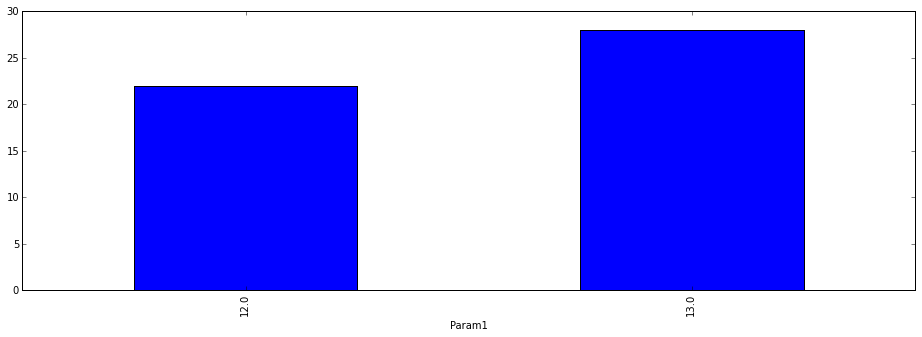

In [21]:
(predParam1['Param2'].count()).plot(kind='bar')

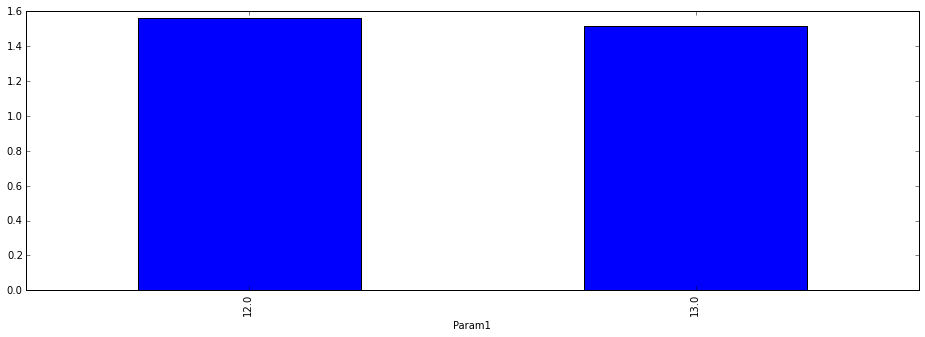

In [22]:
predParam1['MSE'].mean().plot(kind="bar")

In [23]:
predParam1_2 = predictions.groupby(['Param1','Param2'])

In [24]:
predParam1_2['MSE'].mean()

Param1  Param2
12      9         1.322737
        11        1.312793
        13        1.855660
13      9         1.286577
        11        2.045662
        13        1.363038
Name: MSE, dtype: float64

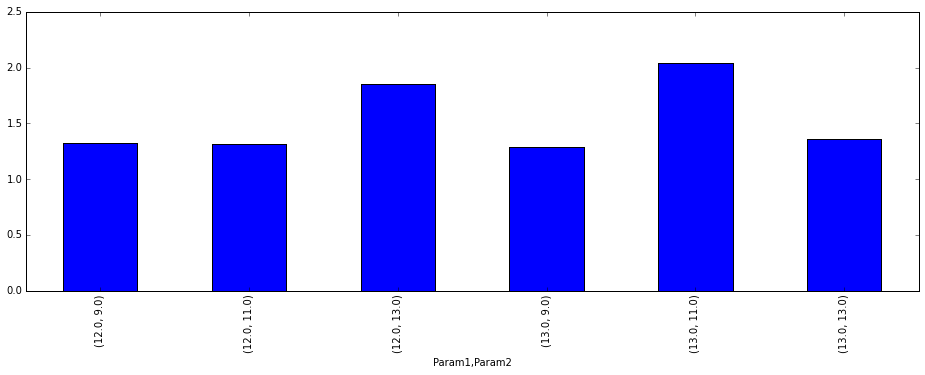

In [25]:
predParam1_2['MSE'].mean().plot(kind='bar')

In [26]:
predictions.groupby('Param3').count()

,Param1,Param2,Param4,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param3,,,,,,,,,,,
0.15,30,30,30,30,30,30,30,30,30,30,30
0.20,16,16,16,16,16,16,16,16,16,16,16
0.25,4,4,4,4,4,4,4,4,4,4,4


In [27]:
predictions.groupby('Param3')['MSE'].mean()

Param3
0.15    1.512938
0.20    1.592493
0.25    1.475004
Name: MSE, dtype: float64

In [28]:
predictions.groupby('Param4').count()

,Param1,Param2,Param3,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time
Param4,,,,,,,,,,,
20,16,16,16,16,16,16,16,16,16,16,16
50,34,34,34,34,34,34,34,34,34,34,34


In [29]:
predictions.groupby('Param4')['MSE'].min()

Param4
20    0.716546
50    0.192438
Name: MSE, dtype: float64